<a href="https://colab.research.google.com/github/kiran-bhandari16/LSTM-Stock-Price-Prediciton/blob/main/Predicting_next(X)days_Stock_Price_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving updated-sbl-data.csv to updated-sbl-data.csv


In [ ]:
df = pd.read_csv('updated-sbl-data.csv')
df.head()

,Date,Open,High,Low,Ltp,Turnover
0,2022-06-29,318.90,318.90,310.00,315.00,"6,127,716.20"
1,2022-06-28,312.00,316.50,306.00,313.00,"5,707,986.70"
2,2022-06-27,322.00,325.00,310.00,312.00,"11,125,995.50"
3,2022-06-26,312.90,320.00,308.00,320.00,"28,577,745.10"
4,2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80"


In [ ]:
df = df.set_index("Date")[['Ltp']].head(1000)

# print('done')

# df.index

In [ ]:
df = df.set_index(pd.to_datetime(df.index))

df.head()

,Ltp
Date,
2022-06-29,315.00
2022-06-28,313.00
2022-06-27,312.00
2022-06-26,320.00
2022-06-24,307.00


In [ ]:
df.index

DatetimeIndex(['2022-06-29', '2022-06-28', '2022-06-27', '2022-06-26',
               '2022-06-24', '2022-06-23', '2022-06-22', '2022-06-21',
               '2022-06-20', '2022-06-19',
               ...
               '2018-03-04', '2018-02-28', '2018-02-27', '2018-02-26',
               '2018-02-25', '2018-02-22', '2018-02-21', '2018-02-20',
               '2018-02-18', '2018-02-15'],
              dtype='datetime64[ns]', name='Date', length=1000, freq=None)

In [ ]:
df.columns

Index(['Ltp'], dtype='object')

In [ ]:
df["Ltp"] = df["Ltp"].str.replace(",","")
ltp = df["Ltp"].apply(lambda x: float(x))

In [ ]:
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns, index=df.index)
df.head()

,Ltp
Date,
2022-06-29,0.154172
2022-06-28,0.148126
2022-06-27,0.145103
2022-06-26,0.169287
2022-06-24,0.129988


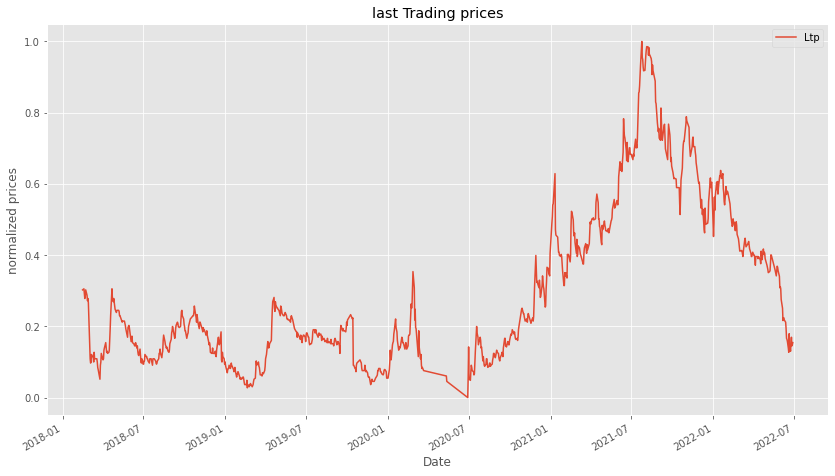

In [ ]:
df.plot(figsize=(14,8))
plt.title('last Trading prices')
plt.ylabel('normalized prices')
plt.show()

In [ ]:
def split_sequences(seq, n_steps_in, n_steps_out):
    X,y =[], []
    
    for i in range(len(seq)):
        end = i+n_steps_in
        out_end = end+ n_steps_out
        
        if out_end >len(seq):
            break
            
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [ ]:
n_per_in = 50
n_per_out = 2

n_features = 1

X,y = split_sequences(list(df.Ltp), n_per_in,n_per_out)

print(X.shape)

X = X.reshape(X.shape[0],X.shape[1],n_features)

print(X.shape)
print(y.shape)

(949, 50)
(949, 50, 1)
(949, 2)


In [ ]:
model = Sequential()
model.add(LSTM(200, activation='softsign', return_sequences=True, input_shape=(n_per_in,n_features)))
model.add(LSTM(200, activation='softsign', return_sequences=True))
model.add(LSTM(200, activation='softsign', return_sequences=True))
model.add(LSTM(200, activation='softsign', return_sequences=True))
model.add(LSTM(200, activation='softsign', return_sequences=True))
model.add(LSTM(200, activation='softsign'))
model.add(Dense(n_per_out))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50, 200)           161600    
                                                                 
 lstm_13 (LSTM)              (None, 50, 200)           320800    
                                                                 
 lstm_14 (LSTM)              (None, 50, 200)           320800    
                                                                 
 lstm_15 (LSTM)              (None, 50, 200)           320800    
                                                                 
 lstm_16 (LSTM)              (None, 50, 200)           320800    
                                                                 
 lstm_17 (LSTM)              (None, 200)               320800    
                                                                 
 dense_2 (Dense)             (None, 2)                

In [ ]:
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

In [ ]:
res = model.fit(X,y, epochs=500, batch_size=64, validation_split=0.1)

Epoch 1/500
14/14 [==============================] - 26s 1s/step - loss: 0.0585 - accuracy: 0.5129 - val_loss: 0.0109 - val_accuracy: 0.5053
Epoch 2/500
14/14 [==============================] - 17s 1s/step - loss: 0.0159 - accuracy: 0.4813 - val_loss: 0.0129 - val_accuracy: 0.4947
Epoch 3/500
14/14 [==============================] - 17s 1s/step - loss: 0.0105 - accuracy: 0.5082 - val_loss: 0.0070 - val_accuracy: 0.5474
Epoch 4/500
14/14 [==============================] - 17s 1s/step - loss: 0.0073 - accuracy: 0.4567 - val_loss: 0.0068 - val_accuracy: 0.4947
Epoch 5/500
14/14 [==============================] - 17s 1s/step - loss: 0.0061 - accuracy: 0.5000 - val_loss: 0.0057 - val_accuracy: 0.4842
Epoch 6/500
14/14 [==============================] - 17s 1s/step - loss: 0.0059 - accuracy: 0.4965 - val_loss: 0.0058 - val_accuracy: 0.4316
Epoch 7/500
14/14 [==============================] - 17s 1s/step - loss: 0.0053 - accuracy: 0.5398 - val_loss: 0.0051 - val_accuracy: 0.4947
Epoch 8/500
1

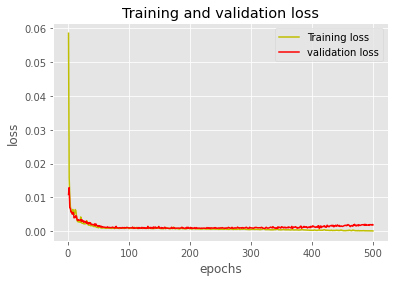

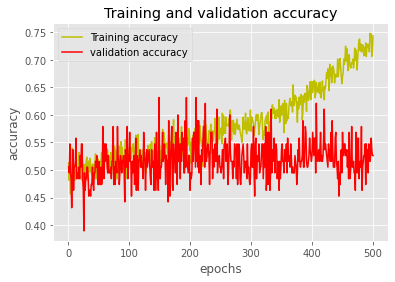

In [ ]:
loss = res.history['loss']
val_loss = res.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss,'y', label="Training loss")
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title("Training and validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


acc = res.history['accuracy']
val_acc = res.history['val_accuracy']
plt.plot(epochs, acc,'y', label="Training accuracy")
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()